# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
import pandas as pd
import numpy as np

data_dir = "https://dlsun.github.io/pods/data/"
titanic_df = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [24]:
titanic_df["type"] = titanic_df["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant staff": "crew"
})

In [25]:
passenger_df = titanic_df[titanic_df["type"] == "passenger"]

pd.crosstab(passenger_df["embarked"], passenger_df["class"], normalize=True)

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [26]:
pd.crosstab(passenger_df["embarked"], passenger_df["class"], normalize="columns")

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


In [27]:
pd.crosstab(passenger_df["embarked"], passenger_df["class"], normalize="index")

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


69.68% of third class passengers embarked at Southampton. 54.05% of Southampton passengers were in third class.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

The visualization below is a great representation of a passenger's class given where they embarked. In this case, there is no numbers. We don't see the actual conditional probabilities. I think both visualization and distribution is necessary to understand the full scope of the question.

<Axes: >

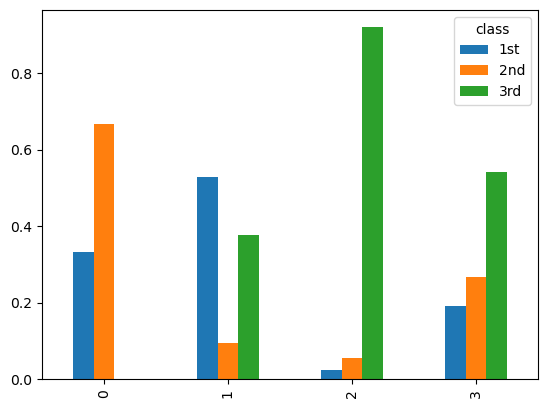

In [28]:
pd.crosstab(passenger_df["embarked"], passenger_df["class"], normalize="index").reset_index().plot(kind="bar")